In [7]:
# Importation du library pandas et numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Chargement des données
df = pd.read_csv("data/train_data.csv")
df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


In [27]:
df.shape

(143579, 14)

In [4]:
df.describe()

,ID,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,143579.000000,1.435790e+05,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000
mean,82521.171097,1.569202e+07,656.411704,38.144476,5.018408,55533.640642,1.553932,0.754107,0.496800,112530.072465,0.212078
std,47650.353367,7.142049e+04,80.210361,8.871711,2.807027,62822.616346,0.546754,0.430617,0.499991,50301.718378,0.408781
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41259.500000,1.563299e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,82485.000000,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117931.100000,0.000000
75%,123793.500000,1.575685e+07,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155149.685000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   Surname          143579 non-null  object 
 3   CreditScore      143579 non-null  int64  
 4   Geography        143579 non-null  object 
 5   Gender           143579 non-null  object 
 6   Age              143579 non-null  float64
 7   Tenure           143579 non-null  int64  
 8   Balance          143579 non-null  float64
 9   NumOfProducts    143579 non-null  int64  
 10  HasCrCard        143579 non-null  float64
 11  IsActiveMember   143579 non-null  float64
 12  EstimatedSalary  143579 non-null  float64
 13  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.3+ MB


In [15]:
df.nunique()

ID                 143579
CustomerId          22017
Surname              2765
CreditScore           456
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             27258
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     50076
Exited                  2
dtype: int64

In [99]:
df.isna().sum(axis=0)

ID                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df["Geography"].value_counts()

Geography
France     81886
Spain      31588
Germany    30105
Name: count, dtype: int64

In [6]:
df["Gender"].value_counts()

Gender
Male      80966
Female    62613
Name: count, dtype: int64

In [26]:
fig = px.scatter(df, x="Balance", y="Age", color="Gender")
fig.update_layout(title="Scatter avec px", font_family="Rockwell")
fig.update_xaxes(title_text='Credit Score')
fig.update_yaxes(title_text='Age')
fig.show()  # il faudra installer nbformat pour afficher dans Jupyter Notebook

Analyse Univarie

Normalisation

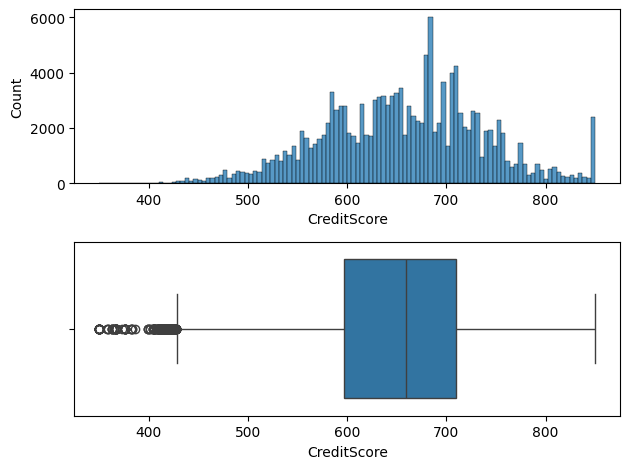

In [20]:
fig, ax = plt.subplots(2,1)
sns.histplot(data=df, x="CreditScore", ax=ax[0])
sns.boxplot(data=df, x="CreditScore", ax=ax[1])
plt.tight_layout()
plt.show()

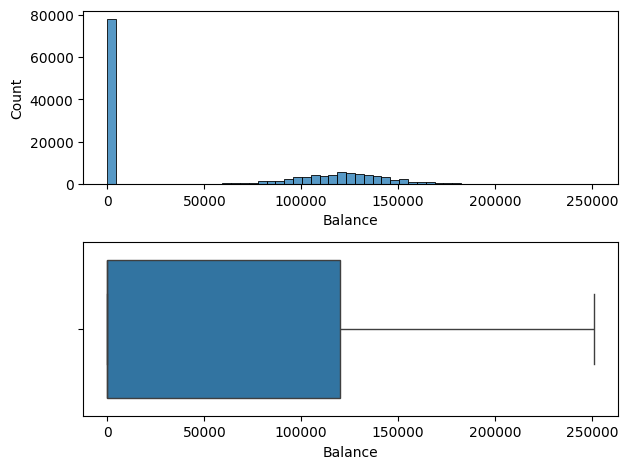

In [21]:
fig, ax = plt.subplots(2,1)
sns.histplot(data=df, x="Balance", ax=ax[0])
sns.boxplot(data=df, x="Balance", ax=ax[1])
plt.tight_layout()
plt.show()

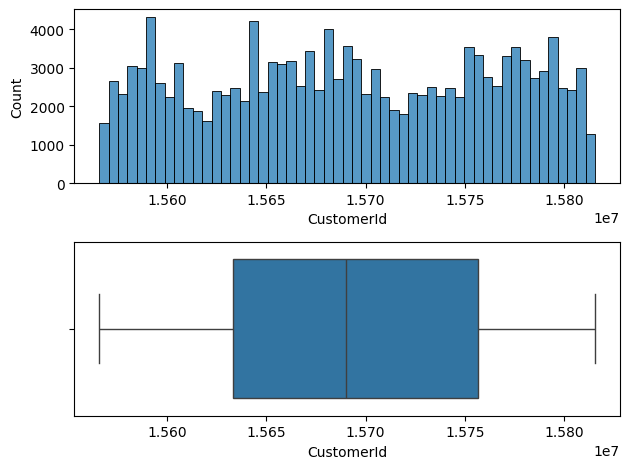

In [22]:
fig, ax = plt.subplots(2,1)
sns.histplot(data=df, x="CustomerId", ax=ax[0])
sns.boxplot(data=df, x="CustomerId", ax=ax[1])
plt.tight_layout()
plt.show()

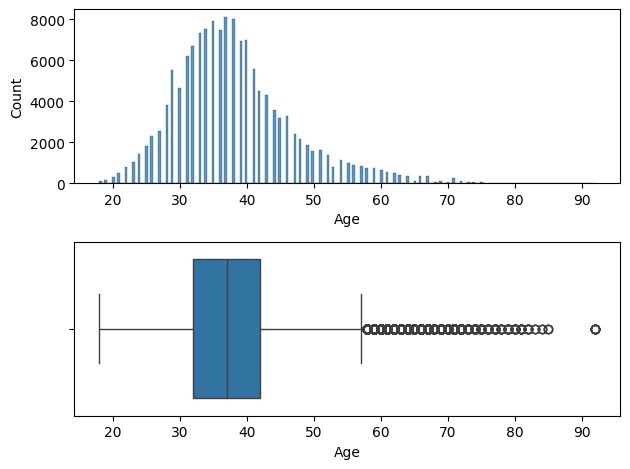

In [23]:
fig, ax = plt.subplots(2,1)
sns.histplot(data=df, x="Age", ax=ax[0])
sns.boxplot(data=df, x="Age", ax=ax[1])
plt.tight_layout()
plt.show()

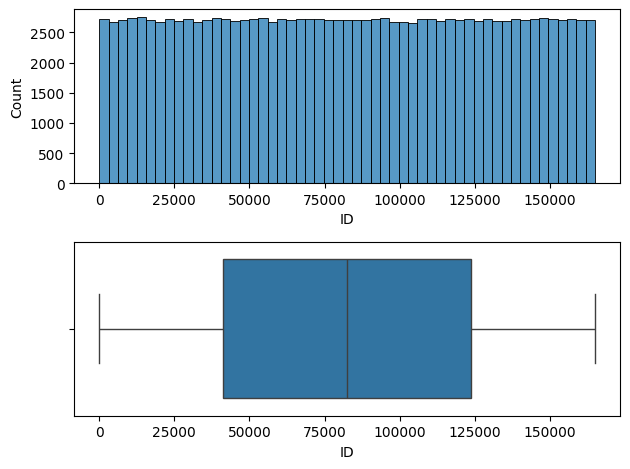

In [24]:
fig, ax = plt.subplots(2,1)
sns.histplot(data=df, x="ID", ax=ax[0])
sns.boxplot(data=df, x="ID", ax=ax[1])
plt.tight_layout()
plt.show()

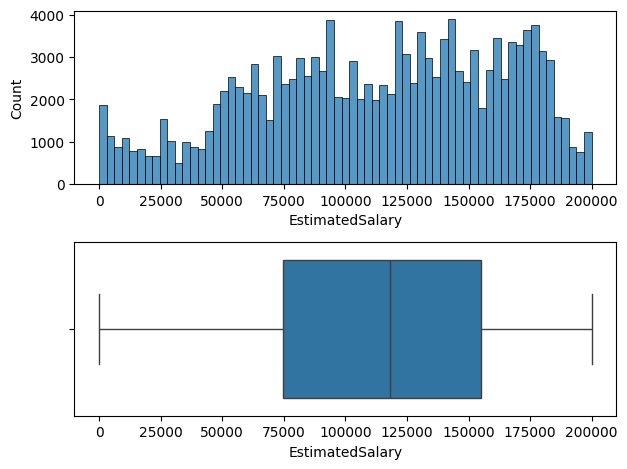

In [ ]:
fig, ax = plt.subplots(2,1)
sns.histplot(data=df, x="EstimatedSalary", ax=ax[0])
sns.boxplot(data=df, x="EstimatedSalary", ax=ax[1])
plt.tight_layout()
plt.show()

Normalisation

In [36]:
df_numeric = df.select_dtypes(include=["number"])
df_numeric

,ID,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,627,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,597,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,724,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,663,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,627,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,559,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,597,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,576,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,751,27.0,4,90721.11,1,0.0,0.0,84496.78,0


In [37]:
df_numeric.shape

(143579, 11)

In [38]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   CreditScore      143579 non-null  int64  
 3   Age              143579 non-null  float64
 4   Tenure           143579 non-null  int64  
 5   Balance          143579 non-null  float64
 6   NumOfProducts    143579 non-null  int64  
 7   HasCrCard        143579 non-null  float64
 8   IsActiveMember   143579 non-null  float64
 9   EstimatedSalary  143579 non-null  float64
 10  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 12.0 MB


In [39]:
Scaler = MinMaxScaler()
Scaler.fit(df_numeric)
df_minmax = pd.DataFrame(Scaler.transform(df_numeric), columns = df_numeric.columns)

MinMaxScaler et Standarisation

In [41]:
Scaler = MinMaxScaler()
Scaler.fit(df_numeric)
df_minmax = pd.DataFrame(Scaler.transform(df_numeric), columns = df_numeric.columns)

In [49]:
Scaler = StandardScaler()
Scaler.fit(df_numeric)
df_scaler = pd.DataFrame(Scaler.transform(df_numeric), columns = df_numeric.columns)

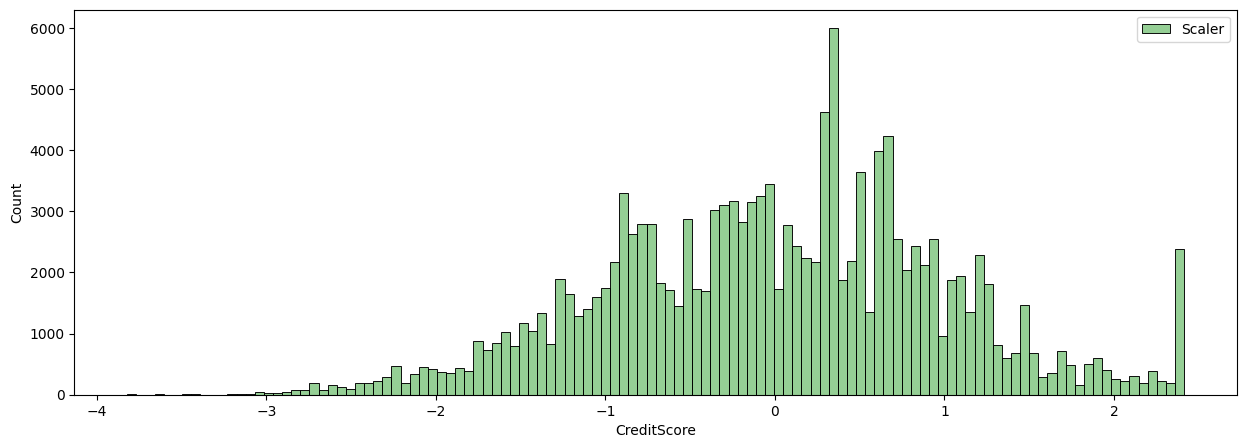

In [85]:
variable = "CreditScore"

plt.figure(figsize=(15,5))
#sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
#sns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
sns.histplot(data=df_scaler, x=variable, color="tab:green", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

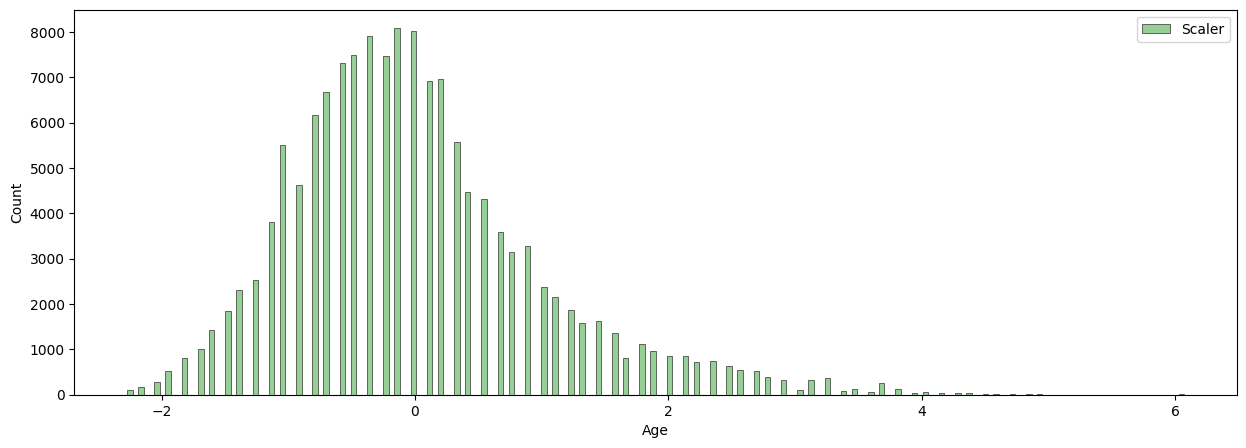

In [87]:
variable = "Age"

plt.figure(figsize=(15,5))
#sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
#sns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
sns.histplot(data=df_scaler, x=variable, color="tab:green", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

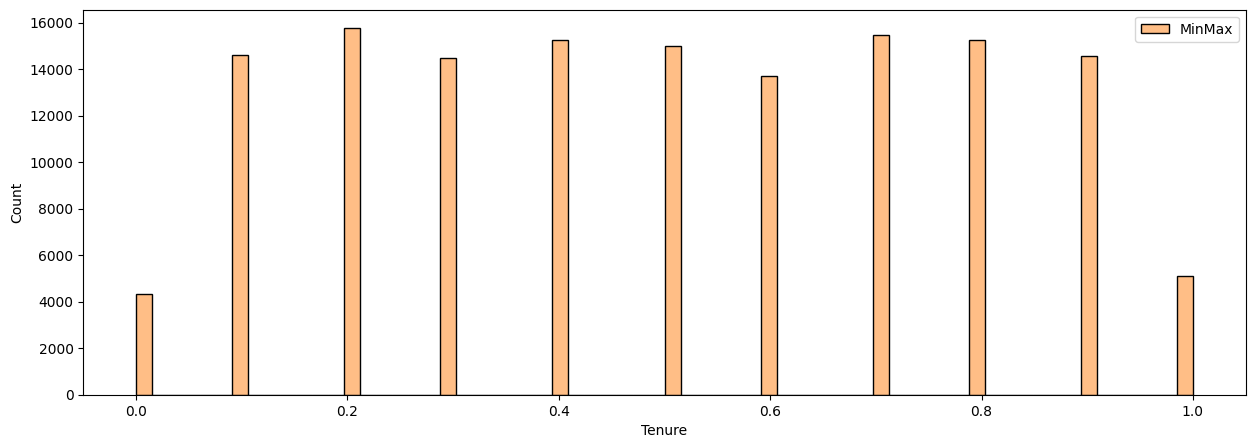

In [89]:
variable = "Tenure"

plt.figure(figsize=(15,5))
#sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
sns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
#sns.histplot(data=df_scaler, x=variable, color="tab:brown", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

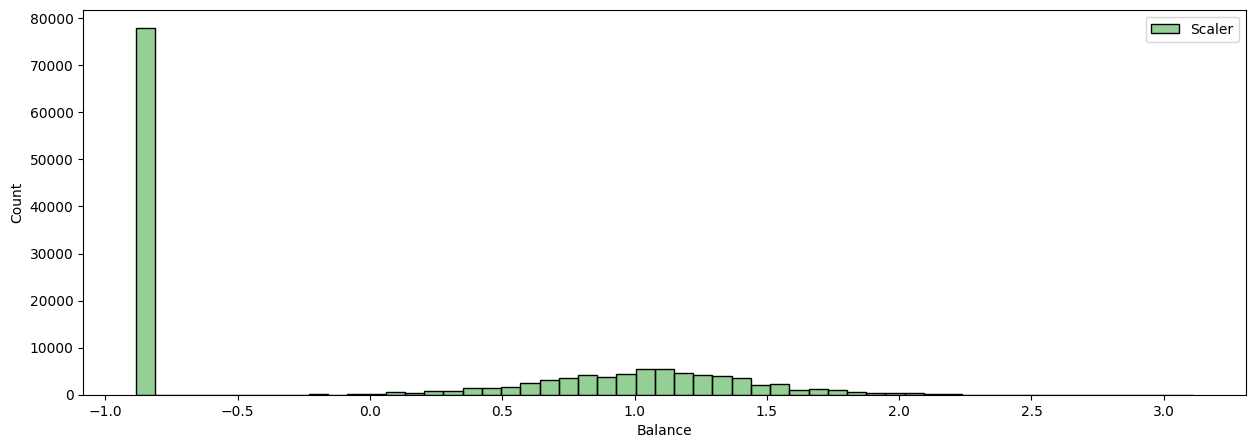

In [90]:
variable = "Balance"

plt.figure(figsize=(15,5))
#sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
#ns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
sns.histplot(data=df_scaler, x=variable, color="tab:green", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

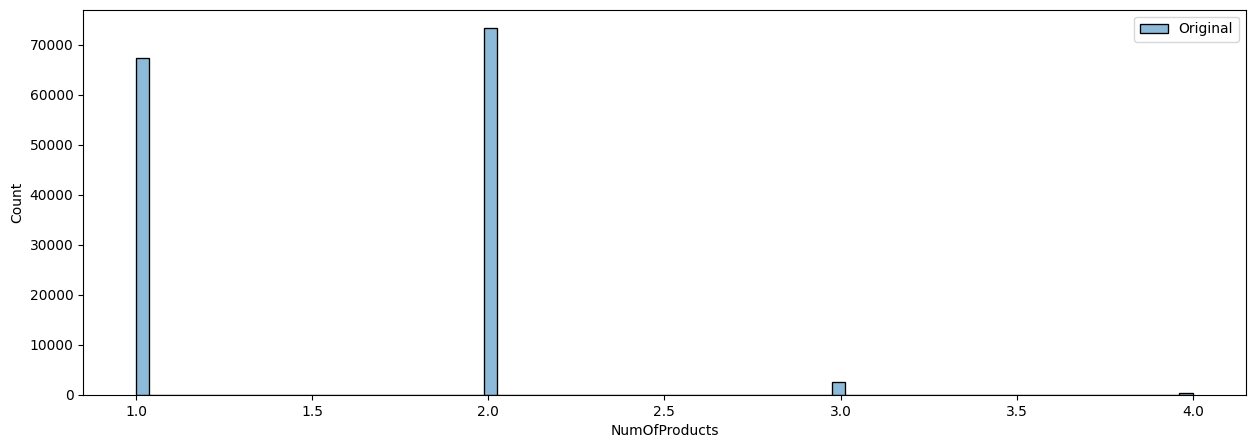

In [93]:
variable = "NumOfProducts"

plt.figure(figsize=(15,5))
sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
#sns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
#sns.histplot(data=df_scaler, x=variable, color="tab:green", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

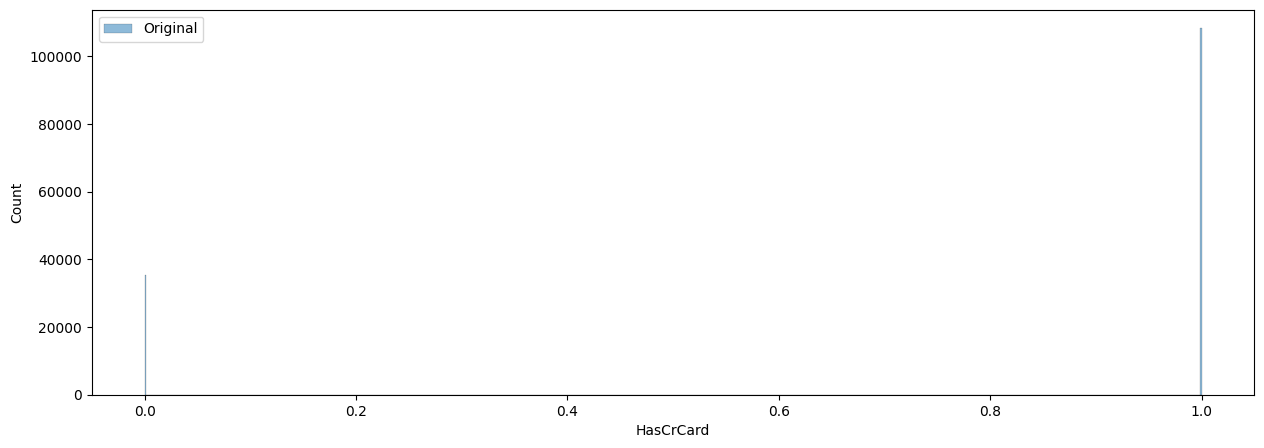

In [79]:
variable = "HasCrCard"

plt.figure(figsize=(15,5))
sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
#sns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
#sns.histplot(data=df_scaler, x=variable, color="tab:green", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

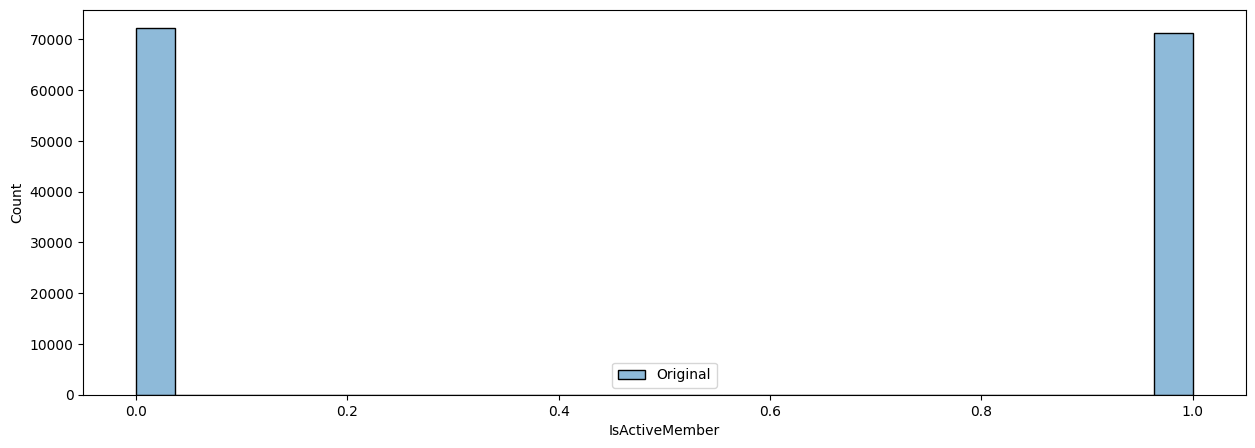

In [95]:
variable = "IsActiveMember"

plt.figure(figsize=(15,5))
sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
#sns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
#sns.histplot(data=df_scaler, x=variable, color="tab:green", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

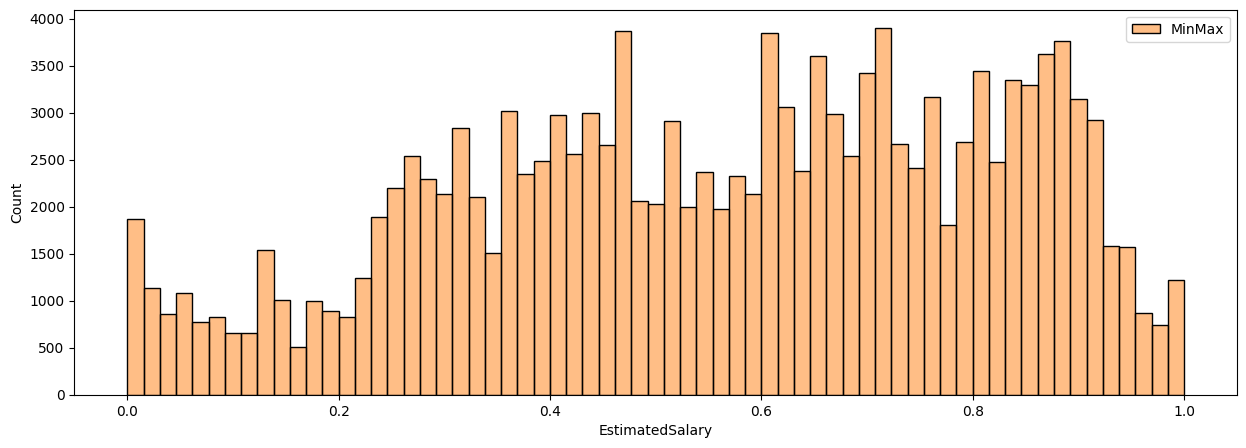

In [98]:
variable = "EstimatedSalary"

plt.figure(figsize=(15,5))
#sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
sns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
#sns.histplot(data=df_scaler, x=variable, color="tab:green", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

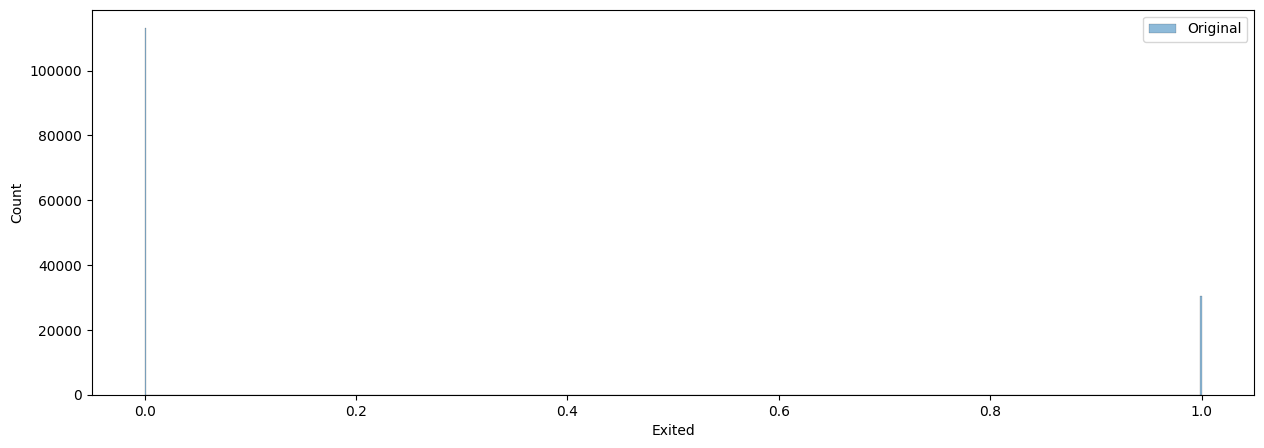

In [97]:
variable = "Exited"

plt.figure(figsize=(15,5))
sns.histplot(data=df_numeric, x=variable, color="tab:blue", alpha=0.5, label="Original")
#sns.histplot(data=df_minmax, x=variable, color="tab:orange", alpha=0.5, label="MinMax")
#sns.histplot(data=df_scaler, x=variable, color="tab:green", alpha=0.5, label="Scaler")
plt.legend()
plt.show()

In [100]:
X = df_numeric.drop(columns=['Exited'])  
y = df_numeric['Exited']

In [101]:
# ✅ Division en jeu d'entraînement (80%) et jeu de test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:

# ✅ Initialisation des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# ✅ Entraînement et évaluation
best_model = None
best_accuracy = 0
best_predictions = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

    # Stocker le meilleur modèle
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name
        best_predictions = y_pred

print(f"\n🏆 Meilleur modèle : {best_model} avec {best_accuracy:.2%} d'accuracy")


Logistic Regression Accuracy: 0.79
Random Forest Accuracy: 0.85
Decision Tree Accuracy: 0.79
KNN Accuracy: 0.75

🏆 Meilleur modèle : Random Forest avec 85.11% d'accuracy
